LDA Learn Shape of X: (150, 2)
LDA Learn Shape of y: (150, 1)
Unique class labels found: [1. 2. 3. 4. 5.]

Class 1.0: Number of samples = 31
Mean vector for class 1.0: [2.84353732 3.22948323]

Class 2.0: Number of samples = 39
Mean vector for class 2.0: [6.06321127 8.19216551]

Class 3.0: Number of samples = 29
Mean vector for class 3.0: [ 4.22278151 11.96673625]

Class 4.0: Number of samples = 26
Mean vector for class 4.0: [11.00791698  4.70430105]

Class 5.0: Number of samples = 25
Mean vector for class 5.0: [ 9.72829148 11.82494404]

Means matrix (d x k): 
[[ 2.84353732  6.06321127  4.22278151 11.00791698  9.72829148]
 [ 3.22948323  8.19216551 11.96673625  4.70430105 11.82494404]]

Covariance matrix (d x d): 
[[10.85927241  1.22704893]
 [ 1.22704893 14.32283255]]
LDA: Shape of means: (2, 5)
LDA: Shape of covariance matrix: (2, 2)
LDA: Shape of Xtest: (100, 2)
LDA: Shape of ytest: (100, 1)
LDA: Inverse of covariance matrix: 
[[ 0.09298736 -0.0079663 ]
 [-0.0079663   0.07050107]]
LDA 

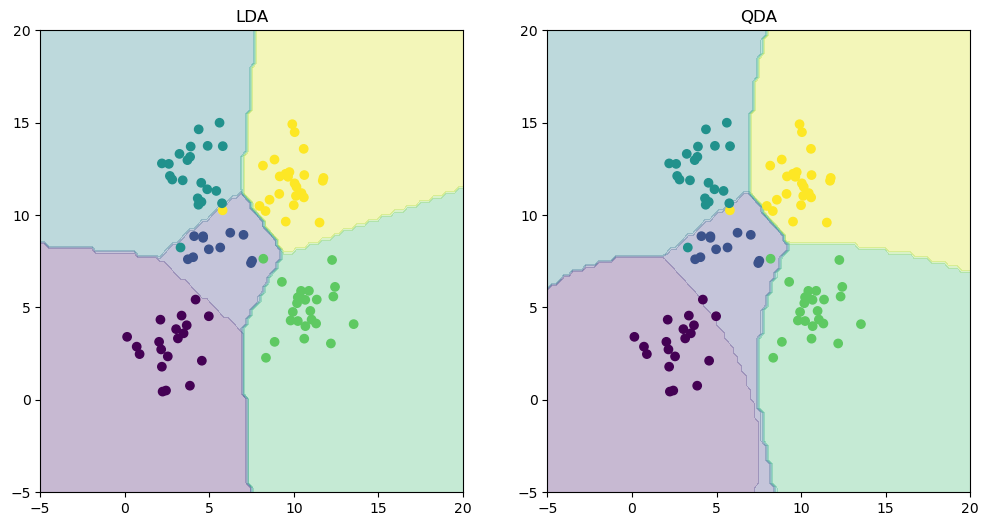

MSE without intercept 106775.36156049925
MSE with intercept 3707.840181743345


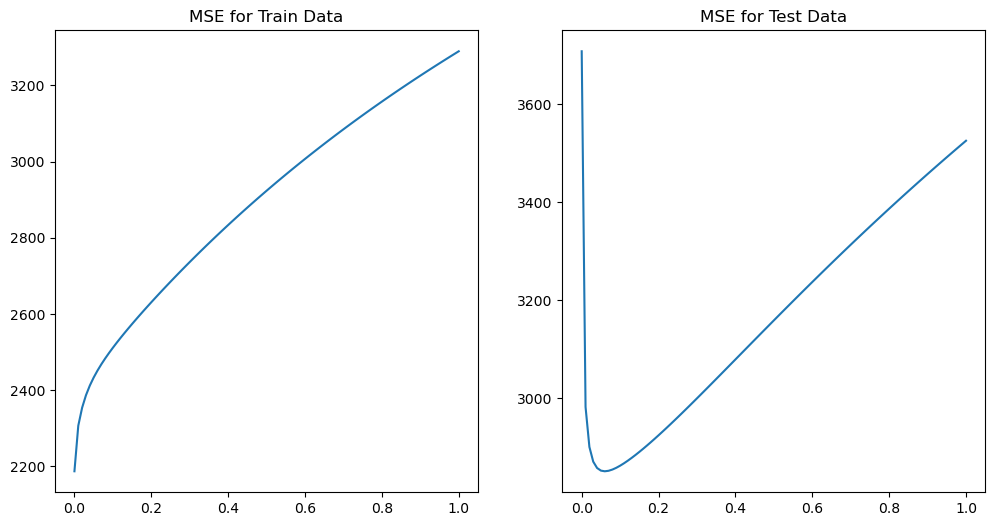

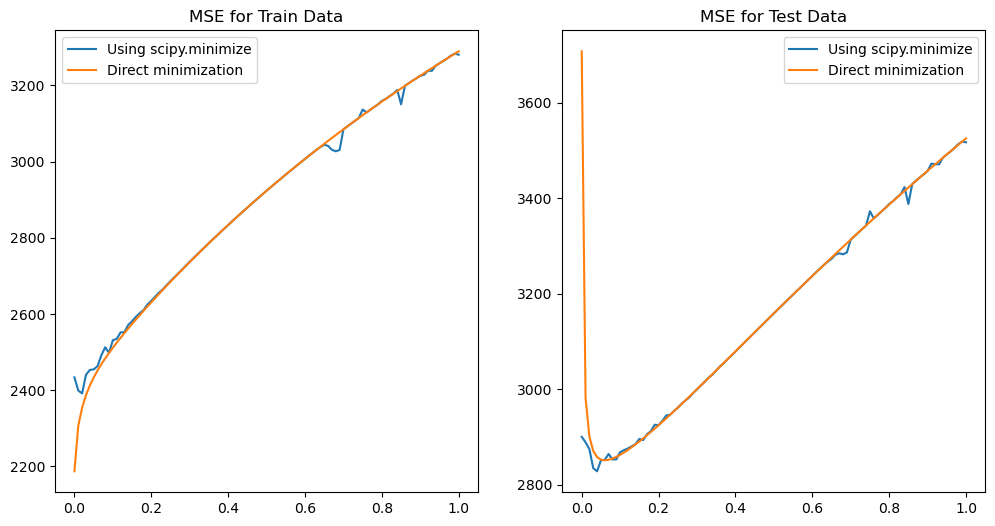

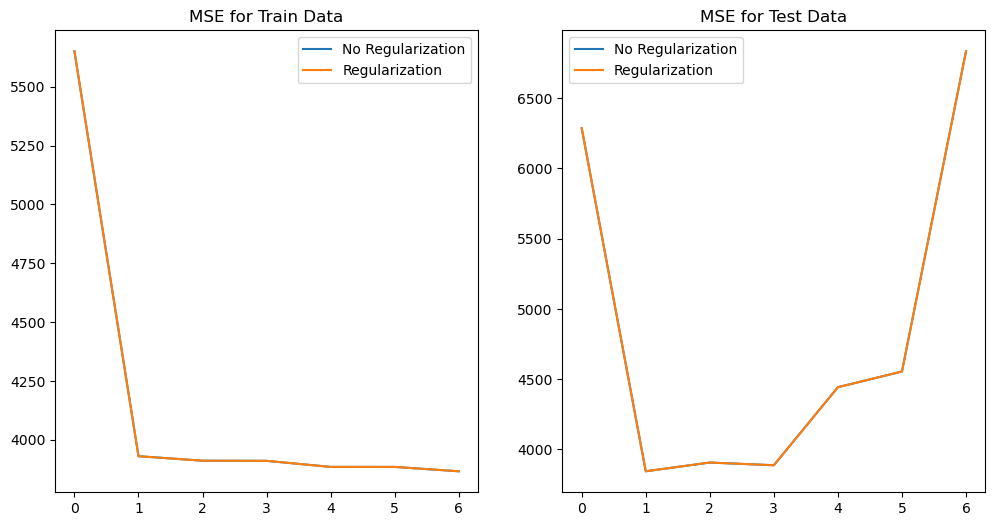

In [29]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys

def ldaLearn(X,y):
    """
    Inputs:
    X - a N x d matrix with each row corresponding to a training example
    y - a N x 1 column vector indicating the labels for each training example
    
    Outputs:
    means - A d x k matrix containing learned means for each of the k classes
    covmat - A single d x d learned covariance matrix 
    """
    # shape of the input matrix and label vector
    print(f"LDA Learn Shape of X: {X.shape}")
    print(f"LDA Learn Shape of y: {y.shape}")
    
    # extracting unique class labels from y
    class_labels = np.unique(y)
    print(f"Unique class labels found: {class_labels}")
    
    # an empty list to store the mean vectors for each class
    means = []
    
    # Loop 
    for c in class_labels:
        # the rows of X corresponding to the current class
        class_data = X[y.flatten() == c]
        print(f"\nClass {c}: Number of samples = {class_data.shape[0]}")
        
        # the mean of the data for this class
        mean_vector = np.mean(class_data, axis=0)
        print(f"Mean vector for class {c}: {mean_vector}")
        
        # appending the mean vector to the list
        means.append(mean_vector)
    
    # converting the list of means to a NumPy array and transpose to match the required d x k shape
    means = np.array(means).T
    print(f"\nMeans matrix (d x k): \n{means}")
    
    # the shared covariance matrix across all classes
    covmat = np.cov(X, rowvar=False)  # rowvar=False treats each column as a variable
    print(f"\nCovariance matrix (d x d): \n{covmat}")
    
    # the means and the shared covariance matrix
    return means, covmat

def qdaLearn(X,y):
    # Inputs
    # X - a N x d matrix with each row corresponding to a training example
    # y - a N x 1 column vector indicating the labels for each training example
    #
    # Outputs
    # means - A d x k matrix containing learnt means for each of the k classes
    # covmats - A list of k d x d learnt covariance matrices for each of the k classes
    
    # IMPLEMENT THIS METHOD
    # shape of the input matrix and label vector
    print(f"QDA Learn Shape of X: {X.shape}")
    print(f"QDA Learn Shape of y: {y.shape}")
    
    # extracting the unique class labels from y
    class_labels = np.unique(y)
    print(f"Unique class labels found: {class_labels}")
    
    # an empty list to store the mean vectors and covariance matrices
    means = []
    covmats = []
    
    # Loop 
    for c in class_labels:
        # extracting the rows of X corresponding to the current class
        class_data = X[y.flatten() == c]
        print(f"\nClass {c}: Number of samples = {class_data.shape[0]}")
        
        # the mean of the data for this class
        mean_vector = np.mean(class_data, axis=0)
        print(f"Mean vector for class {c}: {mean_vector}")
        
        # the covariance matrix for this class
        cov_matrix = np.cov(class_data.T)  # Each class has its own covariance matrix
        print(f"Covariance matrix for class {c}: \n{cov_matrix}")
        
        # appending the mean vector and covariance matrix to the respective lists
        means.append(mean_vector)
        covmats.append(cov_matrix)
    
    # converting the list of means to a NumPy array and transpose to match the required d x k shape
    means = np.array(means).T
    print(f"\nMeans matrix (d x k): \n{means}")
    
    return means, covmats

def ldaTest(means,covmat,Xtest,ytest):
    # Inputs
    # means, covmat - parameters of the LDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # shapes of the input matrices and vectors 
    print(f"LDA: Shape of means: {means.shape}")
    print(f"LDA: Shape of covariance matrix: {covmat.shape}")
    print(f"LDA: Shape of Xtest: {Xtest.shape}")
    print(f"LDA: Shape of ytest: {ytest.shape}")
    
    # inverse of the shared covariance matrix
    inv_covmat = inv(covmat)
    print(f"LDA: Inverse of covariance matrix: \n{inv_covmat}")
    
    preds = []
    for i, x in enumerate(Xtest):
        # Mahalanobis distance to each class mean
        distances = [np.dot(np.dot((x - mean).T, inv_covmat), (x - mean)) for mean in means.T]
        pred_class = np.argmin(distances) + 1  # class with the minimum distance
        preds.append(pred_class)
        #print(f"LDA: Test sample {i}: Predicted class = {pred_class}, Distances = {distances}")
    
    # predictions -> a column vector
    preds = np.array(preds).reshape(-1, 1)
    #print(f"LDA: Predictions: \n{preds}")
    
    # accuracy
    acc = np.mean(preds == ytest) * 100
    #print(f"LDA: Accuracy: {acc}%")
    
    return acc, preds

def qdaTest(means,covmats,Xtest,ytest):
    # Inputs
    # means, covmats - parameters of the QDA model
    # Xtest - a N x d matrix with each row corresponding to a test example
    # ytest - a N x 1 column vector indicating the labels for each test example
    # Outputs
    # acc - A scalar accuracy value
    # ypred - N x 1 column vector indicating the predicted labels

    # shapes of the input matrices and vectors
    print(f"QDA: Shape of means: {means.shape}")
    print(f"QDA: Number of covariance matrices: {len(covmats)}")
    print(f"QDA: Shape of Xtest: {Xtest.shape}")
    print(f"QDA: Shape of ytest: {ytest.shape}")
    
    preds = []
    for i, x in enumerate(Xtest):
        # Mahalanobis distance to each class mean using class-specific covariance matrices
        distances = []
        for mean, covmat in zip(means.T, covmats):
            inv_covmat = inv(covmat)
            distance = np.dot(np.dot((x - mean).T, inv_covmat), (x - mean))
            distances.append(distance)
        pred_class = np.argmin(distances) + 1  # class with the minimum distance
        preds.append(pred_class)
        #print(f"QDA: Test sample {i}: Predicted class = {pred_class}, Distances = {distances}")
    
    # predictions -> a column vector
    preds = np.array(preds).reshape(-1, 1)
    #print(f"QDA: Predictions: \n{preds}")
    
    # accuracy
    acc = np.mean(preds == ytest) * 100
    #print(f"QDA: Accuracy: {acc}%")
    
    return acc, preds

def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 
	
    # the shape of X and y
    #print(f"OLS: Shape of X: {X.shape}")
    #print(f"OLS: Shape of y: {y.shape}")
    
    # the OLS solution: w = (X^T X)^(-1) X^T y
    try:
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        #print(f"OLS: Learned weights (w): \n{w}")
    except np.linalg.LinAlgError:
        #print("OLS: X^T X is singular, cannot compute inverse.")
        return None
    
    return w

def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1 
    
    # shape of X, y, and lambda
    #print(f"Ridge: Shape of X: {X.shape}")
    #print(f"Ridge: Shape of y: {y.shape}")
    #print(f"Ridge: Regularization parameter (lambda): {lambd}")
    
    # Regularization term: lambd * I (identity matrix)
    d = X.shape[1]
    identity_matrix = np.eye(d)
    
    # Ridge Regression solution: w = (X^T X + lambd * I)^(-1) X^T y
    try:
        w = np.linalg.inv(X.T @ X + lambd * identity_matrix) @ X.T @ y
        #print(f"Ridge: Learned weights (w): \n{w}")
    except np.linalg.LinAlgError:
        #print("Ridge: X^T X + lambda * I is singular, cannot compute inverse.")
        return None
    
    return w

def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # mse
    
    # shapes of w, Xtest, and ytest 
    #print(f"Test: Shape of w: {w.shape}")
    #print(f"Test: Shape of Xtest: {Xtest.shape}")
    #print(f"Test: Shape of ytest: {ytest.shape}")
    
    # predicted values: y_pred = Xtest * w
    y_pred = Xtest @ w
    #print(f"Test: Predicted values (y_pred): \n{y_pred}")
    
    # MSE: (1/N) * sum((ytest - y_pred)^2)
    mse = np.mean((ytest - y_pred) ** 2)
    #print(f"Test: Mean Squared Error (MSE): {mse}")
    
    return mse

def regressionObjVal(w, X, y, lambd):

    # compute squared error (scalar) and gradient of squared error with respect
    # to w (vector) for the given data X and y and the regularization parameter
    # lambda                                                                  

    # IMPLEMENT THIS METHOD
    # w is reshaped to a column vector
    w = w.reshape(-1, 1)
    
    # the squared error (without regularization)
    error = 0.5 * np.sum((y - X @ w) ** 2)
    #print(f"Error (without regularization): {error}")
    
    # regularization term to the error
    reg_term = 0.5 * lambd * np.sum(w ** 2)
    error += reg_term
    #print(f"Regularization term: {reg_term}")
    #print(f"Total error (with regularization): {error}")
    
    # the gradient of the squared error
    error_grad = -X.T @ (y - X @ w) + lambd * w  # Gradient of the error with regularization
    error_grad = error_grad.flatten()  # Flatten to a 1D array for the minimizer
    #print(f"Gradient of the error: \n{error_grad}")
    
    return error, error_grad

def mapNonLinear(x,p):
    # Inputs:                                                                  
    # x - a single column vector (N x 1)                                       
    # p - integer (>= 0)                                                       
    # Outputs:                                                                 
    # Xp - (N x (p+1)) 
	
    # no of data points
    N = x.shape[0]
    
    # with ones for the bias term (x^0)
    Xp = np.ones((N, p + 1))
    
    # polynomial features
    for i in range(1, p + 1):
        Xp[:, i] = x.flatten() ** i
        #print(f"Generated x^{i}: \n{Xp[:, i]}")
    
    #print(f"Final mapped non-linear features (degree {p}): \n{Xp}")
    return Xp

# Main script
if __name__ == "__main__":
    # Problem 1
    # load the sample data                                                                 
    if sys.version_info.major == 2:
        X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'))
    else:
        X,y,Xtest,ytest = pickle.load(open('sample.pickle','rb'),encoding = 'latin1')

    # LDA
    means,covmat = ldaLearn(X,y)
    ldaacc,ldares = ldaTest(means,covmat,Xtest,ytest)
    print('LDA Accuracy = '+str(ldaacc))
    # QDA
    means,covmats = qdaLearn(X,y)
    qdaacc,qdares = qdaTest(means,covmats,Xtest,ytest)
    print('QDA Accuracy = '+str(qdaacc))

    # plotting boundaries
    x1 = np.linspace(-5,20,100)
    x2 = np.linspace(-5,20,100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()

    fig = plt.figure(figsize=[12,6])
    plt.subplot(1, 2, 1)

    zacc,zldares = ldaTest(means,covmat,xx,np.zeros((xx.shape[0],1)))
    plt.contourf(x1,x2,zldares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
    plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.ravel())
    plt.title('LDA')

    plt.subplot(1, 2, 2)

    zacc,zqdares = qdaTest(means,covmats,xx,np.zeros((xx.shape[0],1)))
    plt.contourf(x1,x2,zqdares.reshape((x1.shape[0],x2.shape[0])),alpha=0.3)
    plt.scatter(Xtest[:,0],Xtest[:,1],c=ytest.ravel())
    plt.title('QDA')

    plt.show()
    # Problem 2
    if sys.version_info.major == 2:
        X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
    else:
        X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

    # add intercept
    X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
    Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

    w = learnOLERegression(X,y)
    mle = testOLERegression(w,Xtest,ytest)

    w_i = learnOLERegression(X_i,y)
    mle_i = testOLERegression(w_i,Xtest_i,ytest)

    print('MSE without intercept '+str(mle))
    print('MSE with intercept '+str(mle_i))

    # Problem 3
    k = 101
    lambdas = np.linspace(0, 1, num=k)
    i = 0
    mses3_train = np.zeros((k,1))
    mses3 = np.zeros((k,1))
    for lambd in lambdas:
        w_l = learnRidgeRegression(X_i,y,lambd)
        mses3_train[i] = testOLERegression(w_l,X_i,y)
        mses3[i] = testOLERegression(w_l,Xtest_i,ytest)
        i = i + 1
    fig = plt.figure(figsize=[12,6])
    plt.subplot(1, 2, 1)
    plt.plot(lambdas,mses3_train)
    plt.title('MSE for Train Data')
    plt.subplot(1, 2, 2)
    plt.plot(lambdas,mses3)
    plt.title('MSE for Test Data')

    plt.show()
    # Problem 4
    k = 101
    lambdas = np.linspace(0, 1, num=k)
    i = 0
    mses4_train = np.zeros((k,1))
    mses4 = np.zeros((k,1))
    opts = {'maxiter' : 20}    # Preferred value.                                                
    w_init = np.ones((X_i.shape[1],1)).flatten()
    for lambd in lambdas:
        args = (X_i, y, lambd)
        w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
        w_l = np.transpose(np.array(w_l.x))
        w_l = np.reshape(w_l,[len(w_l),1])
        mses4_train[i] = testOLERegression(w_l,X_i,y)
        mses4[i] = testOLERegression(w_l,Xtest_i,ytest)
        i = i + 1
    fig = plt.figure(figsize=[12,6])
    plt.subplot(1, 2, 1)
    plt.plot(lambdas,mses4_train)
    plt.plot(lambdas,mses3_train)
    plt.title('MSE for Train Data')
    plt.legend(['Using scipy.minimize','Direct minimization'])

    plt.subplot(1, 2, 2)
    plt.plot(lambdas,mses4)
    plt.plot(lambdas,mses3)
    plt.title('MSE for Test Data')
    plt.legend(['Using scipy.minimize','Direct minimization'])
    plt.show()


    # Problem 5
    pmax = 7
    lambda_opt = 0 # REPLACE THIS WITH lambda_opt estimated from Problem 3
    mses5_train = np.zeros((pmax,2))
    mses5 = np.zeros((pmax,2))
    for p in range(pmax):
        Xd = mapNonLinear(X[:,2],p)
        Xdtest = mapNonLinear(Xtest[:,2],p)
        w_d1 = learnRidgeRegression(Xd,y,0)
        mses5_train[p,0] = testOLERegression(w_d1,Xd,y)
        mses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
        w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
        mses5_train[p,1] = testOLERegression(w_d2,Xd,y)
        mses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)

    fig = plt.figure(figsize=[12,6])
    plt.subplot(1, 2, 1)
    plt.plot(range(pmax),mses5_train)
    plt.title('MSE for Train Data')
    plt.legend(('No Regularization','Regularization'))
    plt.subplot(1, 2, 2)
    plt.plot(range(pmax),mses5)
    plt.title('MSE for Test Data')
    plt.legend(('No Regularization','Regularization'))
    plt.show()


In [26]:
#References Used:
#1) http://numpy.org/
#2) https://en.wikipedia.org/wiki/Linear_discriminant_analysis
#3) https://en.wikipedia.org/wiki/Covariance_matrix
#4) https://en.wikipedia.org/wiki/Quadratic_discriminant_analysis
#5) https://en.wikipedia.org/wiki/Covariance_matrix
#6) https://en.wikipedia.org/wiki/Linear_regression
#7) https://en.wikipedia.org/wiki/Tikhonov_regularization
#8) https://en.wikipedia.org/wiki/Gradient_descent